# Importing the modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import warnings

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Importing the models

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv("D:\major project 8th sem\Obfuscated-MalMem2022.csv")

In [5]:
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [6]:
df.tail()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,Malware


In [7]:
df.shape

(58596, 57)

In [8]:
df.isnull().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [9]:
df.keys()

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

In [10]:
df['Class'].value_counts()

Benign     29298
Malware    29298
Name: Class, dtype: int64

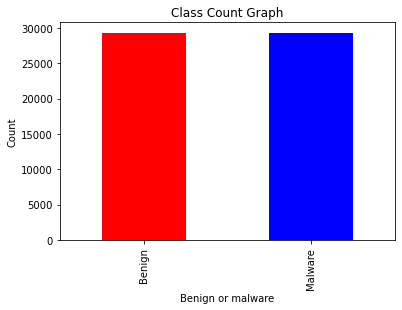

In [11]:
#Graphical Representation of count value of class column
color = ['r','b']
df['Class'].value_counts().plot(kind='bar',color =color)
plt.xlabel("Benign or malware")
plt.ylabel("Count")
plt.title("Class Count Graph")
plt.show()

In [12]:
df = df.drop(columns = ['Category'])
df.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,Benign
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,Benign
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,Benign
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,Benign
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,Benign


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   pslist.nproc                            58596 non-null  int64  
 1   pslist.nppid                            58596 non-null  int64  
 2   pslist.avg_threads                      58596 non-null  float64
 3   pslist.nprocs64bit                      58596 non-null  int64  
 4   pslist.avg_handlers                     58596 non-null  float64
 5   dlllist.ndlls                           58596 non-null  int64  
 6   dlllist.avg_dlls_per_proc               58596 non-null  float64
 7   handles.nhandles                        58596 non-null  int64  
 8   handles.avg_handles_per_proc            58596 non-null  float64
 9   handles.nport                           58596 non-null  int64  
 10  handles.nfile                           58596 non-null  in

In [14]:
df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


# Label Encoder

In [15]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,0


In [16]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
cormat = df.corr()
cormat = cormat.dropna(how = 'all', axis=1)
cormat = cormat.dropna(how = 'all', axis=0)
cormat.style.background_gradient(cmap='coolwarm')

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,ldrmodules.not_in_load_avg,ldrmodules.not_in_init_avg,ldrmodules.not_in_mem_avg,malfind.ninjections,malfind.commitCharge,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist,psxview.not_in_eprocess_pool,psxview.not_in_ethread_pool,psxview.not_in_pspcid_list,psxview.not_in_csrss_handles,psxview.not_in_session,psxview.not_in_deskthrd,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_csrss_handles_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
pslist.nproc,1.000000,0.485450,-0.208960,-0.004850,0.567111,-0.006901,0.207611,0.021915,0.025362,0.439907,0.797307,0.531769,0.394747,0.788766,0.533282,0.548720,0.347883,0.448911,0.470199,0.578571,0.470278,0.159933,0.123465,0.159944,0.214289,0.066744,0.215874,0.096707,0.029184,-0.008371,0.459952,0.028994,0.459623,0.029109,0.487936,-0.019717,-0.001478,0.230229,-0.019502,0.084746,-0.112891,0.081497,0.306615,0.119179,0.079452,-0.003133,0.027375,0.221725,0.431282,-0.053061,-0.030426,0.008045,-0.198375
pslist.nppid,0.485450,1.000000,-0.726761,-0.224777,-0.094653,-0.594012,-0.093094,-0.160602,-0.014648,-0.284957,0.440316,0.169364,-0.343277,0.462853,-0.021113,-0.035257,-0.279771,-0.144343,-0.037273,0.095420,-0.037174,-0.005005,0.149168,-0.004859,0.262524,0.146118,0.263139,0.156528,0.287556,0.026200,0.295887,0.286115,0.296058,0.287466,0.321065,0.263311,0.013694,0.325463,0.261112,0.236350,0.209341,0.240048,0.148202,-0.354249,-0.111617,-0.016397,-0.652891,-0.244422,0.005160,-0.239525,-0.010932,0.002349,0.429412
pslist.avg_threads,-0.208960,-0.726761,1.000000,0.332666,0.556844,0.904915,0.281238,0.242195,0.031132,0.669253,-0.006762,0.344213,0.755972,-0.061671,0.475176,0.509805,0.633242,0.603562,0.467246,0.361007,0.467142,0.157886,-0.110266,0.157636,-0.189267,-0.163739,-0.188214,-0.155386,-0.259396,-0.030652,-0.327649,-0.258384,-0.327924,-0.259312,-0.353575,-0.252881,-0.010574,-0.328078,-0.251077,-0.296610,-0.230287,-0.331517,-0.099228,0.551229,0.225709,0.026714,0.804723,0.522784,0.347861,0.298627,-0.007511,0.009647,-0.790666
pslist.avg_handlers,-0.004850,-0.224777,0.332666,1.000000,0.275566,0.360883,0.971557,0.992540,0.940025,0.319069,0.122858,0.222870,0.395172,0.212297,0.406917,0.325196,0.296503,0.297768,0.246395,0.212783,0.246372,0.099835,-0.011743,0.099742,-0.065289,-0.063925,-0.064760,-0.057840,-0.075495,-0.011964,-0.096923,-0.075479,-0.095422,-0.075456,-0.098993,-0.075407,-0.002105,-0.097198,-0.075231,-0.102486,-0.078512,-0.109463,0.068224,0.239654,0.105178,0.010450,0.317883,0.250562,0.204127,0.069981,-0.010605,0.007308,-0.334098
dlllist.ndlls,0.567111,-0.094653,0.556844,0.275566,1.000000,0.778771,0.427131,0.211031,0.049199,0.966431,0.782131,0.850942,0.942160,0.725933,0.936104,0.954186,0.845377,0.941774,0.877295,0.894965,0.877302,0.295745,0.035055,0.295532,-0.005434,-0.088366,-0.002966,-0.062225,-0.135196,-0.028176,-0.078838,-0.135186,-0.079445,-0.135141,-0.069689,-0.164818,-0.003183,-0.134211,-0.164226,-0.260563,-0.235538,-0.289133,0.343051,0.584471,0.299932,0.045204,0.645479,0.681809,0.752189,0.198395,-0.040057,0.026202,-0.823933
dlllist.avg_dlls_per_proc,-0.006901,-0.594012,0.904915,0.360883,0.778771,1.000000,0.365824,0.264175,0.041660,0.855561,0.260322,0.606887,0.870704,0.196176,0.727970,0.737027,0.783625,0.808948,0.696563,0.613879,0.696499,0.249190,-0.0617

In [17]:
cormat.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.228529,0.053473,0.104001,0.146082,0.294950,0.194768,0.197972,0.136934,0.092214,0.278204,...,0.200088,0.141414,0.063878,0.139480,0.258389,0.317725,0.053895,0.000509,0.030472,-0.256430
std,0.268989,0.304748,0.408330,0.296059,0.451787,0.457047,0.306881,0.276582,0.253968,0.459912,...,0.380337,0.287915,0.236263,0.423171,0.378243,0.335656,0.218447,0.140968,0.139139,0.423693
min,-0.208960,-0.726761,-0.790666,-0.334098,-0.823933,-0.908555,-0.382270,-0.254925,-0.043897,-0.876770,...,-0.631078,-0.441368,-0.365017,-0.763656,-0.710979,-0.653268,-0.429510,-0.051312,-0.065100,-0.908555
25%,0.021915,-0.094653,-0.230287,-0.075231,-0.078838,-0.208453,-0.043667,-0.041333,-0.010305,-0.116137,...,-0.094406,-0.015533,-0.000183,-0.244808,-0.022773,0.057931,-0.044991,-0.035805,0.000499,-0.710979
50%,0.159933,0.013694,0.009647,0.069981,0.211031,0.169991,0.143245,0.052294,0.015015,0.244617,...,0.119179,0.074514,0.005553,0.060816,0.187618,0.194295,-0.006192,-0.011454,0.006427,-0.198375
75%,0.459623,0.263139,0.467142,0.275566,0.752189,0.664838,0.377766,0.211031,0.043353,0.740902,...,0.555415,0.277698,0.035523,0.438272,0.612364,0.661561,0.170699,-0.007822,0.027875,0.064523
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# function for final dataset

In [18]:
def getCorrelationFeature(corrdata,threshold):
    feature=[]
    value=[]
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['corr values'])
    return df

In [19]:
threshold=0.60
corr_value=getCorrelationFeature(cormat['Class'],threshold)
corr_value

,corr values
pslist.avg_threads,-0.790666
dlllist.ndlls,-0.823933
dlllist.avg_dlls_per_proc,-0.908555
handles.nevent,-0.876770
handles.nkey,-0.698239
handles.nthread,-0.872531
handles.nsemaphore,-0.769097
handles.ntimer,-0.783137
handles.nsection,-0.820967
handles.nmutant,-0.855148


In [20]:
correlated_data=df[corr_value.index]
correlated_data.head()

,pslist.avg_threads,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nevent,handles.nkey,handles.nthread,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,svcscan.nservices,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,Class
0,10.555556,1694,38.500000,3161,716,887,671,125,184,257,53,95,53,389,24,116,121,0
1,11.531915,2074,44.127660,3761,1011,1030,766,148,337,394,77,123,77,392,24,118,122,0
2,14.725000,1932,48.300000,3996,784,1241,645,138,369,338,51,89,51,395,27,118,120,0
3,13.500000,1445,45.156250,2961,654,792,567,127,186,242,31,62,31,395,27,118,120,0
4,11.452381,2067,49.214286,3834,1252,942,825,135,375,429,102,143,102,392,24,118,124,0


In [21]:
correlated_data.shape

(58596, 18)

In [22]:
cr = correlated_data.corr()
cr.style.background_gradient(cmap='coolwarm')

,pslist.avg_threads,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nevent,handles.nkey,handles.nthread,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,svcscan.nservices,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,Class
pslist.avg_threads,1.000000,0.556844,0.904915,0.669253,0.344213,0.755972,0.475176,0.509805,0.633242,0.603562,0.467246,0.361007,0.467142,0.551229,0.804723,0.522784,0.347861,-0.790666
dlllist.ndlls,0.556844,1.000000,0.778771,0.966431,0.850942,0.942160,0.936104,0.954186,0.845377,0.941774,0.877295,0.894965,0.877302,0.584471,0.645479,0.681809,0.752189,-0.823933
dlllist.avg_dlls_per_proc,0.904915,0.778771,1.000000,0.855561,0.606887,0.870704,0.727970,0.737027,0.783625,0.808948,0.696563,0.613879,0.696499,0.664838,0.861711,0.689500,0.572227,-0.908555
handles.nevent,0.669253,0.966431,0.855561,1.000000,0.778542,0.970617,0.911175,0.916121,0.871247,0.918108,0.832952,0.822146,0.832934,0.627050,0.751268,0.711607,0.740902,-0.876770
handles.nkey,0.344213,0.850942,0.606887,0.778542,1.000000,0.714498,0.879381,0.826131,0.699994,0.879408,0.860766,0.876698,0.860766,0.446913,0.369862,0.609934,0.696005,-0.698239
handles.nthread,0.755972,0.942160,0.870704,0.970617,0.714498,1.000000,0.870358,0.895127,0.856938,0.894548,0.788829,0.770008,0.788797,0.614663,0.781128,0.668564,0.672696,-0.872531
handles.nsemaphore,0.475176,0.936104,0.727970,0.911175,0.879381,0.870358,1.000000,0.936018,0.783777,0.917112,0.848873,0.864087,0.848899,0.559798,0.579426,0.691145,0.802029,-0.769097
handles.ntimer,0.509805,0.954186,0.737027,0.916121,0.826131,0.895127,0.936018,1.000000,0.801272,0.891780,0.811126,0.831520,0.811163,0.581583,0.646096,0.685462,0.779188,-0.783137
handles.nsection,0.633242,0.845377,0.783625,0.871247,0.699994,0.856938,0.783777,0.801272,1.000000,0.818858,0.745585,0.720692,0.745555,0.556481,0.670045,0.631014,0.631392,-0.820967
handles.nmutant,0.603562,0.941774,0.808948,0.918108,0.879408,0.894548,0.917112,0.891780,0.818858,1.000000,0.922379,0.907001,0.922381,0.555415,0.591462,0.677297,0.751283,-0.855148


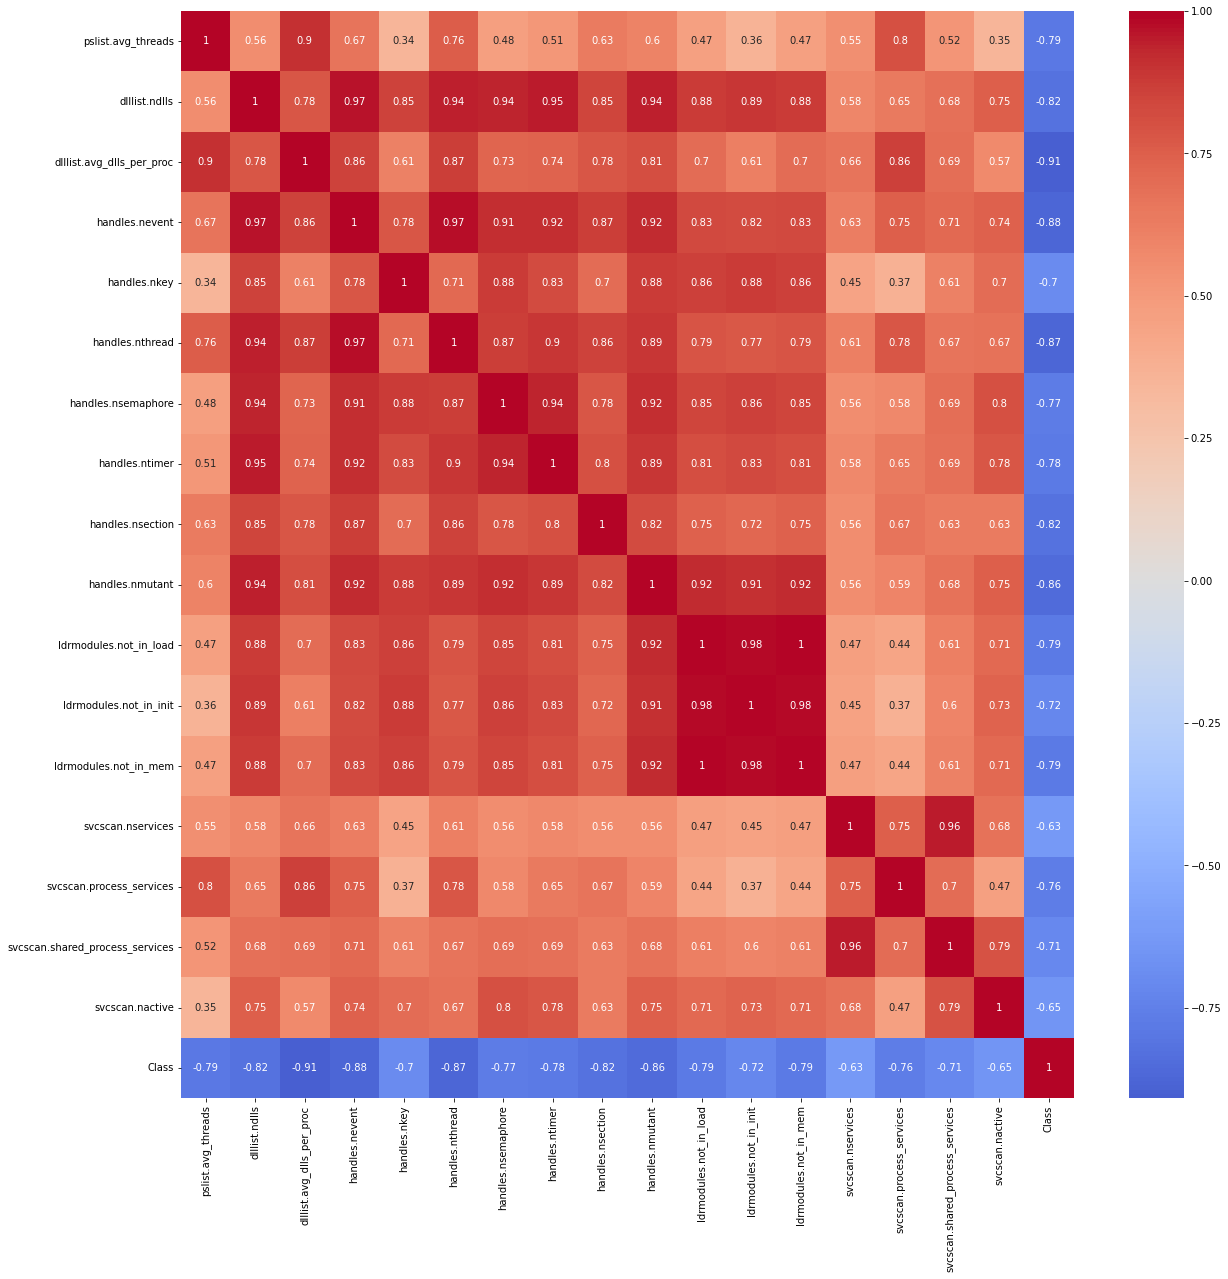

In [23]:
fig , ax = plt.subplots(figsize=(20,20))
sns.heatmap(cr, cmap='coolwarm', center=0, annot=True)
plt.savefig("hea_t.png",dpi=300)
#sns.heatmap(cr, cmap='BrBG', center=0, annot=True)
#sns.heatmap(cr, annot=True, ax=ax)

# PAIRPLOT

# TRAIN TEST SPLIT

In [24]:
#Splitting the data into train and test case
x=correlated_data.drop(labels=['Class'],axis=1)
y=correlated_data['Class']
x.head()

,pslist.avg_threads,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nevent,handles.nkey,handles.nthread,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,svcscan.nservices,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive
0,10.555556,1694,38.500000,3161,716,887,671,125,184,257,53,95,53,389,24,116,121
1,11.531915,2074,44.127660,3761,1011,1030,766,148,337,394,77,123,77,392,24,118,122
2,14.725000,1932,48.300000,3996,784,1241,645,138,369,338,51,89,51,395,27,118,120
3,13.500000,1445,45.156250,2961,654,792,567,127,186,242,31,62,31,395,27,118,120
4,11.452381,2067,49.214286,3834,1252,942,825,135,375,429,102,143,102,392,24,118,124


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [26]:
print(x_train.shape,x_test.shape)

(46876, 17) (11720, 17)


In [27]:
y_train.shape,y_test.shape

((46876,), (11720,))

In [28]:
test_y = np.array(y_test)
test_y

array([1, 0, 1, ..., 0, 0, 0])

In [29]:
y_train =np.array(y_train)
y_train

array([1, 0, 0, ..., 1, 0, 1])

# Feature Scaling

In [30]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# WORK FOR TRAINING DATA

# Cross validation

In [31]:
#list of models
models = [LogisticRegression(max_iter=30000),SVC(kernel='linear',probability=True),KNeighborsClassifier(n_neighbors=10),RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=50),GaussianNB(),DecisionTreeClassifier()]

In [32]:
def compare_models_cross_validation():
    mean_accuracy = []
    mean_precision = []
    mean_recall = []
    mean_f1 = []
    for model in models:
        cv_score = cross_val_score(model,x_train,y_train,cv=10)
        mean_acc = (sum(cv_score)/len(cv_score))
        mean_accuracy.append(mean_acc)
        mean_prec = cross_val_score(model,x_train,y_train,scoring = 'precision',cv=10).mean()
        mean_precision.append(mean_prec)
        mean_rec = cross_val_score(model,x_train,y_train,scoring = 'recall',cv=10).mean()
        mean_recall.append(mean_rec)
        mean_f1_score = cross_val_score(model,x_train,y_train,scoring = 'f1',cv=10).mean()
        mean_f1.append(mean_f1_score)
        #y_cv_pred= cross_val_predict(model,x_train,y_train,cv=10)
        #y_cv_tpred= cross_val_predict(model,x_test,y_test,cv=10)
    return mean_accuracy,mean_precision,mean_recall,mean_f1

In [33]:
mean_accuracy,mean_precision,mean_recall,mean_f1= compare_models_cross_validation()
for i,model in enumerate(models):
    print("---------------------------------------")
    print("Model:",model)
    print('Mean Accuracy = ',mean_accuracy[i])
    print('Mean Precision = ',mean_precision[i])
    print('Mean Recall = ',mean_recall[i])
    print('Mean F1_score = ',mean_f1[i])
    #print('y_train prediction',y_cv_pred[i])
    #print('y_testing prediction',y_cv_tpred[i])
    print("-------------------------------------")

---------------------------------------
Model: LogisticRegression(max_iter=30000)
Mean Accuracy =  0.9986346848555769
Mean Precision =  0.9991041308447286
Mean Recall =  0.9981666203145763
Mean F1_score =  0.99863473876201
-------------------------------------
---------------------------------------
Model: SVC(kernel='linear', probability=True)
Mean Accuracy =  0.998848004538004
Mean Precision =  0.9992749430443905
Mean Recall =  0.9984224656767313
Mean F1_score =  0.9988480493461072
-------------------------------------
---------------------------------------
Model: KNeighborsClassifier(n_neighbors=10)
Mean Accuracy =  0.9995093447055285
Mean Precision =  0.999701674217318
Mean Recall =  0.9993177881145968
Mean F1_score =  0.9995094901664932
-------------------------------------
---------------------------------------
Model: RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
Mean Accuracy =  0.9988906666540449
Mean Precision =  0.9994881267418393
Mean Rec

# NO CROSS VALIDATION 

In [34]:
def ytprediction():
    y_pred_train = []
    for model in models:
        model.fit(x_train,y_train)
        ytrain_pred = model.predict(x_train)
        y_pred_train.append(ytrain_pred)
    return y_pred_train

In [35]:
y_pred_train=ytprediction()

In [36]:
y_pred_train[0]

array([1, 0, 0, ..., 1, 0, 1])

# CONFUSION MATRIX

In [37]:
def train_conf_matrix():
    for i, model in enumerate(models):
        cf_matrix = confusion_matrix(y_train,y_pred_train[i])
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

        ax.set_title('Training Seaborn Confusion Matrix with labels\n\n');
        ax.set_xlabel('\nPredicted ')
        ax.set_ylabel('Actual  ');
        plt.show()
        print(model)
        print('*******************************************************')
        print()

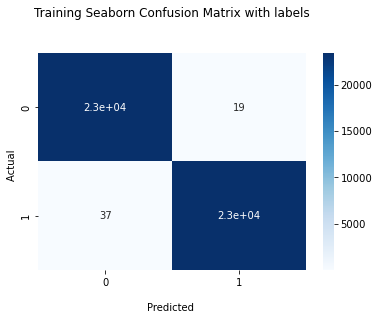

LogisticRegression(max_iter=30000)
*******************************************************



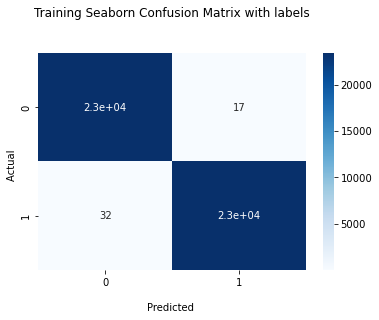

SVC(kernel='linear', probability=True)
*******************************************************



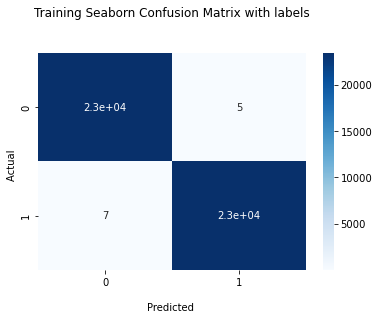

KNeighborsClassifier(n_neighbors=10)
*******************************************************



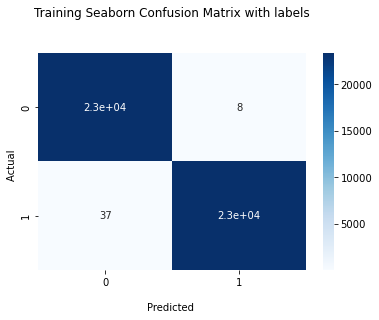

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
*******************************************************



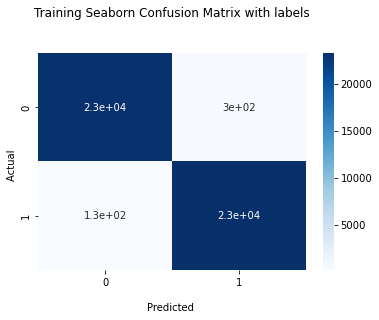

GaussianNB()
*******************************************************



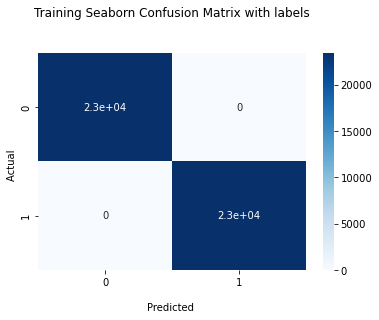

DecisionTreeClassifier()
*******************************************************



In [38]:
train_conf_matrix()

In [39]:
def dp():
    tacc = []
    tprec = []
    trec = []
    tf1 = []
    #y_pred_train = []
    for i, model in enumerate(models):
        #ytrain_pred = model.predict(x_train)
        #y_pred_train.append(ytrain_pred)
        accuracy = metrics.accuracy_score(y_train,y_pred_train[i])
        #print(accuracy)
        tacc.append(accuracy)
        precision=metrics.precision_score(y_train,y_pred_train[i])
        #print(precision)
        tprec.append(precision)
        recall = metrics.recall_score(y_train,y_pred_train[i])
        #print(recall)
        trec.append(recall)
        t_f1=metrics.f1_score(y_train,y_pred_train[i])
        #print(t_f1)
        tf1.append(t_f1)
    return tacc,tprec,trec,tf1

In [40]:
tacc,tprec,trec,tf1 = dp()

In [41]:
def aprf():
    print('Displaying the values for the train data')
    for i, model in enumerate(models):
        print('-------------------------------------------------------')
        print('Accuracy of the ',model,'=',tacc[i])
        print('Precision of the ',model,'=',tprec[i])
        print('Recall of the ',model,'=',trec[i])
        print('F1 score of the ',model,'=',tf1[i])
        print('---------------------------------------------------------')

In [42]:
aprf()

Displaying the values for the train data
-------------------------------------------------------
Accuracy of the  LogisticRegression(max_iter=30000) = 0.9988053588190119
Precision of the  LogisticRegression(max_iter=30000) = 0.9991892468529977
Recall of the  LogisticRegression(max_iter=30000) = 0.9984223766682301
F1 score of the  LogisticRegression(max_iter=30000) = 0.9988056645623614
---------------------------------------------------------
-------------------------------------------------------
Accuracy of the  SVC(kernel='linear', probability=True) = 0.9989546889666354
Precision of the  SVC(kernel='linear', probability=True) = 0.9992746821401144
Recall of the  SVC(kernel='linear', probability=True) = 0.9986355690103611
F1 score of the  SVC(kernel='linear', probability=True) = 0.9989550233520291
---------------------------------------------------------
-------------------------------------------------------
Accuracy of the  KNeighborsClassifier(n_neighbors=10) = 0.9997440054612168
Pr

# GRAPH FOR THE TRAIN DATA 

# TRAINING ACCURACY GRAPH

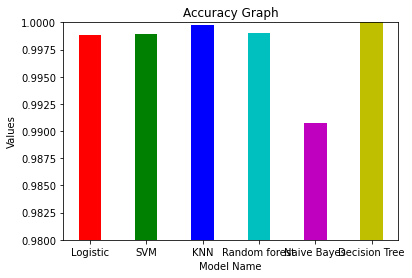

In [43]:
#graph plotting
val = {'Logistic':tacc[0],'SVM':tacc[1],'KNN':tacc[2],'Random forest':tacc[3],'Naive Bayes':tacc[4],'Decision Tree':tacc[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Accuracy Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [44]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        tacc[0],
        tacc[1],
        tacc[2],
        tacc[3],
        tacc[4],
        tacc[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,1.000000
2,KNN,0.999744
3,Random Forest,0.999040
1,SVM,0.998955
0,Logistic Regression,0.998805
4,Naive Bayes,0.990784


# TRAINING PRECISION GRAPH

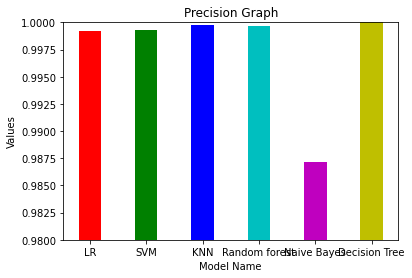

In [45]:
val = {'LR':tprec[0],'SVM':tprec[1],'KNN':tprec[2],'Random forest':tprec[3],'Naive Bayes':tprec[4],'Decision Tree':tacc[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Precision Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [46]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision tree'],
    'Score': [
        tprec[0],
        tprec[1],
        tprec[2],
        tprec[3],
        tprec[4],
        tprec[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision tree,1.000000
2,KNN,0.999787
3,Random Forest,0.999658
1,SVM,0.999275
0,Logistic Regression,0.999189
4,Naive Bayes,0.987176


# TRAINING RECALL GRAPH

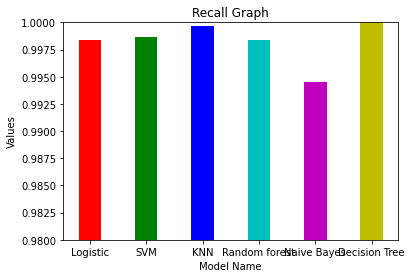

In [47]:
val = {'Logistic':trec[0],'SVM':trec[1],'KNN':trec[2],'Random forest':trec[3],'Naive Bayes':trec[4],'Decision Tree':trec[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Recall Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [48]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        trec[0],
        trec[1],
        trec[2],
        trec[3],
        trec[4],
        trec[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,1.000000
2,KNN,0.999702
1,SVM,0.998636
0,Logistic Regression,0.998422
3,Random Forest,0.998422
4,Naive Bayes,0.994500


# TRAINING F1 SCORE GRPAH

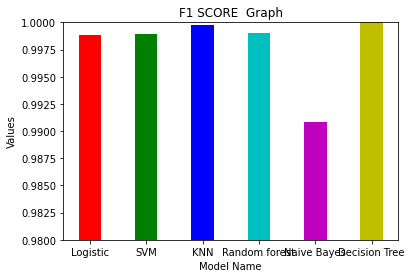

In [49]:
val = {'Logistic':tf1[0],'SVM':tf1[1],'KNN':tf1[2],'Random forest':tf1[3],'Naive Bayes':tf1[4],'Decision Tree':tf1[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('F1 SCORE  Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [50]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        tf1[0],
        tf1[1],
        tf1[2],
        tf1[3],
        tf1[4],
        tf1[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,1.000000
2,KNN,0.999744
3,Random Forest,0.999040
1,SVM,0.998955
0,Logistic Regression,0.998806
4,Naive Bayes,0.990824


# TAINING ROC CURVE

In [51]:
def trc_curv():
    for i,model in enumerate(models):
        cr_probs = model.predict_proba(x_train)
        cr_probs = cr_probs[:, 1]
        cr_auc = roc_auc_score(y_train, cr_probs)
        #cr_auc=np.append(cr_auc,cr_auc)
        cr_fpr,cr_tpr, _ = roc_curve(y_train,cr_probs)
        #cr_fpr=np.append(cr_fpr,cr_fpr)
        #cr_tpr=np.append(cr_tpr,cr_tpr)
        print(model)
        print('----------------------------------------------------------------------------------')
        plt.plot(cr_fpr,cr_tpr, marker='*',label='(AUROC = %0.10f)'% cr_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.title('ROC PLOT')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        #plt.savefig('roc_grpah.jpg')
        plt.show()
        print('--------------------------------------------------------------------------------')

LogisticRegression(max_iter=30000)
----------------------------------------------------------------------------------


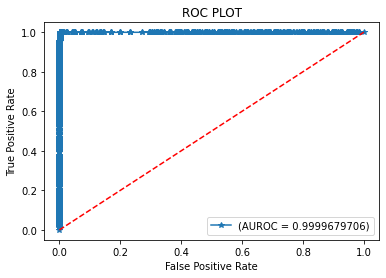

--------------------------------------------------------------------------------
SVC(kernel='linear', probability=True)
----------------------------------------------------------------------------------


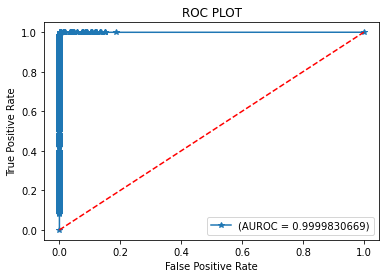

--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=10)
----------------------------------------------------------------------------------


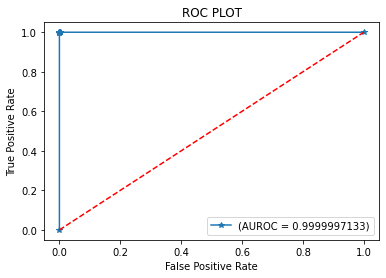

--------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
----------------------------------------------------------------------------------


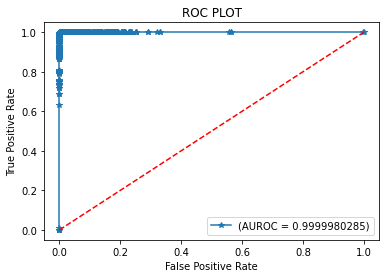

--------------------------------------------------------------------------------
GaussianNB()
----------------------------------------------------------------------------------


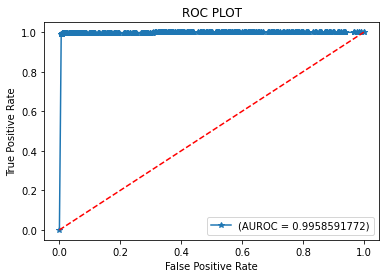

--------------------------------------------------------------------------------
DecisionTreeClassifier()
----------------------------------------------------------------------------------


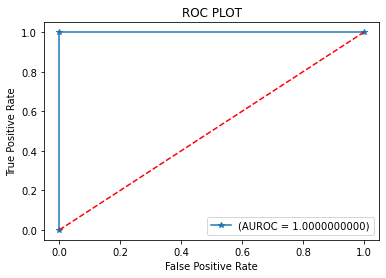

--------------------------------------------------------------------------------


In [52]:
trc_curv()

# TRAINING ROC CURVE

In [53]:
for model in models:
    lr_probs = model.predict_proba(x_train)
    sv_probs = model.predict_proba(x_train)
    kn_probs = model.predict_proba(x_train)
    rf_probs = model.predict_proba(x_train)
    nb_probs = model.predict_proba(x_train)
    dt_probs = model.predict_proba(x_train)

In [54]:
#Probabilities for the positive outcome is kept.
lr_probs = lr_probs[:, 1]
sv_probs = sv_probs[:, 1]
rf_probs = rf_probs[:, 1]
kn_probs = kn_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]

In [55]:
lr_auc = roc_auc_score(y_train, lr_probs)
rf_auc = roc_auc_score(y_train, rf_probs)
nb_auc = roc_auc_score(y_train, nb_probs)
sv_auc = roc_auc_score(y_train, sv_probs)
kn_auc = roc_auc_score(y_train, kn_probs)
dt_auc = roc_auc_score(y_train, dt_probs)

In [56]:
#printing AUROC  scores
print('Logistic : AUROC = %.10f' % (lr_auc))
print('SVM : AUROC = %.10f' % (sv_auc))
print('Random Forest: AUROC = %.10f' % (rf_auc))
print('KNN : AUROC = %.10f' % (kn_auc))
print('Naive Bayes: AUROC = %.10f' % (nb_auc))
print('Decision Tree: AUROC = %.10f' % (dt_auc))

Logistic : AUROC = 1.0000000000
SVM : AUROC = 1.0000000000
Random Forest: AUROC = 1.0000000000
KNN : AUROC = 1.0000000000
Naive Bayes: AUROC = 1.0000000000
Decision Tree: AUROC = 1.0000000000


In [57]:
#Calculate ROC curve
lr_fpr,lr_tpr, _ = roc_curve(y_train,lr_probs)
sv_fpr,sv_tpr, _ =  roc_curve(y_train, sv_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_train, rf_probs)
kn_fpr,kn_tpr, _ = roc_curve(y_train, kn_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_train, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_train, dt_probs)

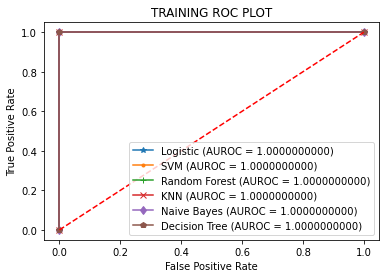

In [58]:
#plotting the diagram
plt.plot(lr_fpr,lr_tpr, marker='*', label='Logistic (AUROC = %0.10f)' % lr_auc)
plt.plot(sv_fpr,sv_tpr, marker='.', label='SVM (AUROC = %0.10f)' % sv_auc)
plt.plot(rf_fpr, rf_tpr, marker='+', label='Random Forest (AUROC = %0.10f)' % rf_auc)
plt.plot(kn_fpr,kn_tpr, marker='x', label='KNN (AUROC = %0.10f)' % kn_auc)
plt.plot(nb_fpr, nb_tpr, marker='d', label='Naive Bayes (AUROC = %0.10f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='p', label='Decision Tree (AUROC = %0.10f)' % dt_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('TRAINING ROC PLOT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.savefig('roc_grpah.jpg')
plt.show()

# WORK FOR THE TEST DATA

# Comparing the performance of the model

In [59]:
def tst_train():
    lst = []
    for model in models:
        y_pred = model.predict(x_test)
        lst.append(y_pred)
    return lst

In [60]:
y_pred = tst_train()
print(y_pred)

[array([1, 0, 1, ..., 0, 0, 0]), array([1, 0, 1, ..., 0, 0, 0]), array([1, 0, 1, ..., 0, 0, 0]), array([1, 0, 1, ..., 0, 0, 0]), array([1, 0, 1, ..., 0, 0, 0]), array([1, 0, 1, ..., 0, 0, 0])]


In [61]:
def model_fitting():
    for i,model in enumerate(models):
        cf_matrix = confusion_matrix(test_y,y_pred[i])
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

        ax.set_title('Seaborn Confusion Matrix with labels\n\n');
        ax.set_xlabel('\nPredicted ')
        ax.set_ylabel('Actual  ');
        plt.show()
        print(model)
        print('*******************************************************')
        print()

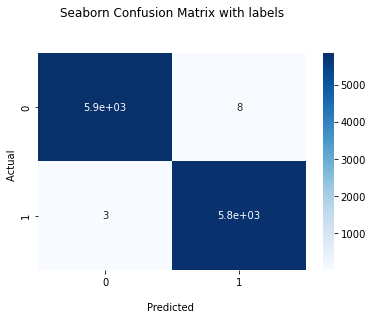

LogisticRegression(max_iter=30000)
*******************************************************



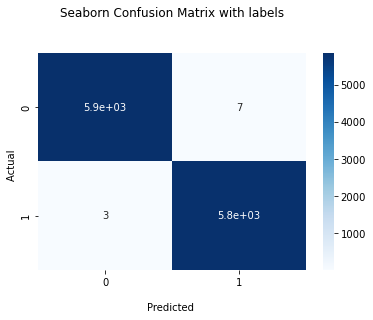

SVC(kernel='linear', probability=True)
*******************************************************



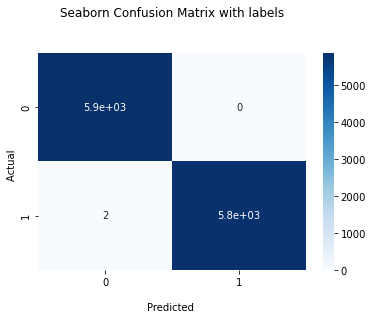

KNeighborsClassifier(n_neighbors=10)
*******************************************************



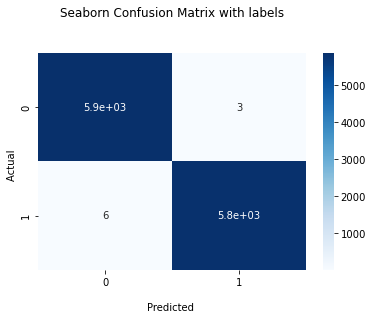

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
*******************************************************



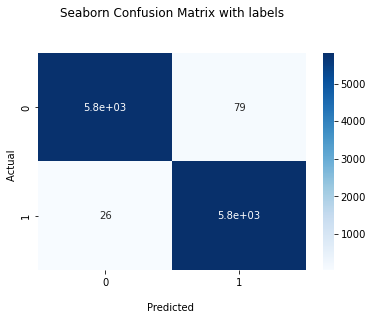

GaussianNB()
*******************************************************



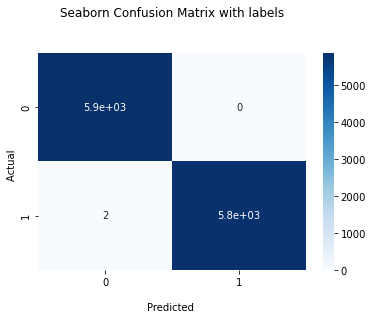

DecisionTreeClassifier()
*******************************************************



In [62]:
model_fitting()

In [63]:
def comp():
    acc=[]
    pre=[]
    rec=[]
    f1_s=[]
    for i,model in enumerate(models):
        accuracy = metrics.accuracy_score(test_y,y_pred[i])
        acc.append(accuracy)
        precision = metrics.precision_score(test_y,y_pred[i])
        pre.append(precision)
        recall = metrics.recall_score(test_y, y_pred[i])
        rec.append(recall)
        fscore = metrics.f1_score(test_y, y_pred[i])
        f1_s.append(fscore)
    return acc,pre,rec,f1_s


In [64]:
acc,pre,rec,f1_s = comp()

In [65]:
def display():
    target_names = ['Benign', 'Malware']
    for i,model in enumerate(models):
        print('Accuracy score of the',model,'=',acc[i],'\n')
        print('Precision score of the',model,'=',pre[i],'\n')
        print('Recall score of the',model,'=',rec[i],'\n')
        print('f1 score of the ',model,'=',f1_s[i],'\n')
        print('**********************************************************************')
        print(classification_report(test_y, y_pred[i], target_names=target_names))
        print('-------------------------------------------------------------------------')

In [66]:
display()

Accuracy score of the LogisticRegression(max_iter=30000) = 0.999061433447099 

Precision score of the LogisticRegression(max_iter=30000) = 0.9986324786324786 

Recall score of the LogisticRegression(max_iter=30000) = 0.999486740804106 

f1 score of the  LogisticRegression(max_iter=30000) = 0.9990594271056007 

**********************************************************************
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5875
     Malware       1.00      1.00      1.00      5845

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720

-------------------------------------------------------------------------
Accuracy score of the SVC(kernel='linear', probability=True) = 0.9991467576791809 

Precision score of the SVC(kernel='linear', probability=True) = 0.9988032142246538 

Recall score of the SVC(kernel='linear', probab

# ACCURACY GRAPH

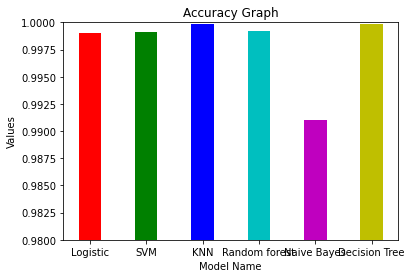

In [67]:
#graph plotting
val = {'Logistic':acc[0],'SVM':acc[1],'KNN':acc[2],'Random forest':acc[3],'Naive Bayes':acc[4],'Decision Tree':acc[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Accuracy Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()
#plt.savefig('Accuracy_bar.jpg')


In [68]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        acc[0],
        acc[1],
        acc[2],
        acc[3],
        acc[4],
        acc[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,0.999829
5,Decision Tree,0.999829
3,Random Forest,0.999232
1,SVM,0.999147
0,Logistic Regression,0.999061
4,Naive Bayes,0.991041


# PRECISION GRAPH

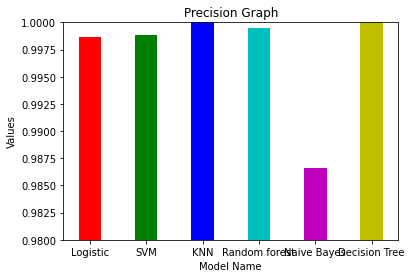

In [69]:
val = {'Logistic':pre[0],'SVM':pre[1],'KNN':pre[2],'Random forest':pre[3],'Naive Bayes':pre[4],'Decision Tree':pre[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Precision Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [70]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        pre[0],
        pre[1],
        pre[2],
        pre[3],
        pre[4],
        pre[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,1.000000
5,Decision Tree,1.000000
3,Random Forest,0.999486
1,SVM,0.998803
0,Logistic Regression,0.998632
4,Naive Bayes,0.986606


# RECALL GRAPH

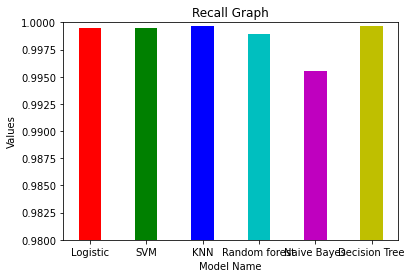

In [71]:
val = {'Logistic':rec[0],'SVM':rec[1],'KNN':rec[2],'Random forest':rec[3],'Naive Bayes':rec[4],'Decision Tree':rec[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Recall Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [72]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        rec[0],
        rec[1],
        rec[2],
        rec[3],
        rec[4],
        rec[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,0.999658
5,Decision Tree,0.999658
0,Logistic Regression,0.999487
1,SVM,0.999487
3,Random Forest,0.998973
4,Naive Bayes,0.995552


# F1 SCORE GRPAH

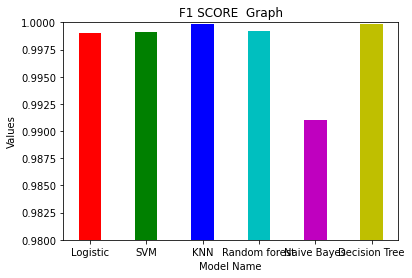

In [73]:
val = {'Logistic':f1_s[0],'SVM':f1_s[1],'KNN':f1_s[2],'Random forest':f1_s[3],'Naive Bayes':f1_s[4],'Decision Tree':f1_s[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('F1 SCORE  Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [74]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        f1_s[0],
        f1_s[1],
        f1_s[2],
        f1_s[3],
        f1_s[4],
        f1_s[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,0.999829
5,Decision Tree,0.999829
3,Random Forest,0.999230
1,SVM,0.999145
0,Logistic Regression,0.999059
4,Naive Bayes,0.991059


# ROC CURVE

In [75]:
def rc_curv():
    for i,model in enumerate(models):
        cr_probs = model.predict_proba(x_test)
        cr_probs = cr_probs[:, 1]
        cr_auc = roc_auc_score(test_y, cr_probs)
        #cr_auc=np.append(cr_auc,cr_auc)
        cr_fpr,cr_tpr, _ = roc_curve(test_y,cr_probs)
        #cr_fpr=np.append(cr_fpr,cr_fpr)
        #cr_tpr=np.append(cr_tpr,cr_tpr)
        print(model)
        print('----------------------------------------------------------------------------------')
        plt.plot(cr_fpr,cr_tpr, marker='*',label='(AUROC = %0.10f)'% cr_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.title('ROC PLOT')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        #plt.savefig('roc_grpah.jpg')
        plt.show()
        print('--------------------------------------------------------------------------------')

LogisticRegression(max_iter=30000)
----------------------------------------------------------------------------------


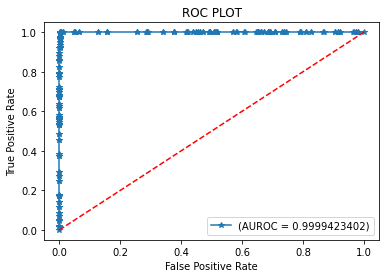

--------------------------------------------------------------------------------
SVC(kernel='linear', probability=True)
----------------------------------------------------------------------------------


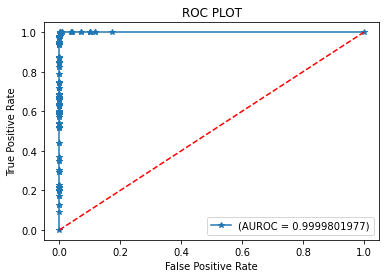

--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=10)
----------------------------------------------------------------------------------


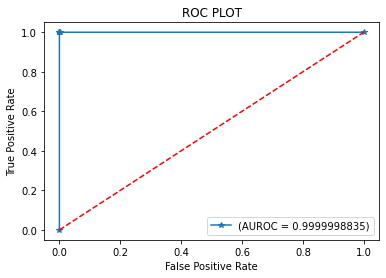

--------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
----------------------------------------------------------------------------------


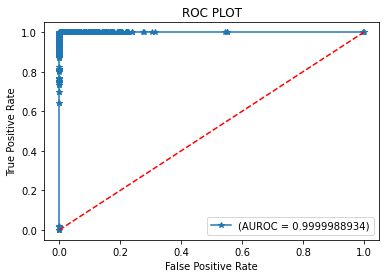

--------------------------------------------------------------------------------
GaussianNB()
----------------------------------------------------------------------------------


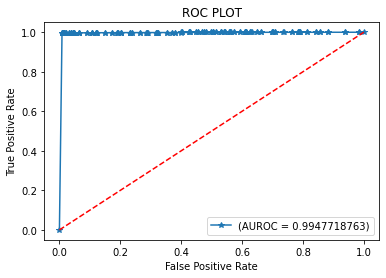

--------------------------------------------------------------------------------
DecisionTreeClassifier()
----------------------------------------------------------------------------------


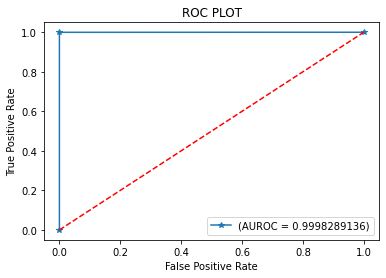

--------------------------------------------------------------------------------


In [76]:
rc_curv()

# COMMON ROC GRPAH

In [77]:
for model in models:
    lr_probs = model.predict_proba(x_test)
    sv_probs = model.predict_proba(x_test)
    kn_probs = model.predict_proba(x_test)
    rf_probs = model.predict_proba(x_test)
    nb_probs = model.predict_proba(x_test)
    dt_probs = model.predict_proba(x_test)

In [78]:
#Probabilities for the positive outcome is kept.
lr_probs = lr_probs[:, 1]
sv_probs = sv_probs[:, 1]
rf_probs = rf_probs[:, 1]
kn_probs = kn_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]

In [79]:
lr_auc = roc_auc_score(test_y, lr_probs)
rf_auc = roc_auc_score(test_y, rf_probs)
nb_auc = roc_auc_score(test_y, nb_probs)
sv_auc = roc_auc_score(test_y, sv_probs)
kn_auc = roc_auc_score(test_y, kn_probs)
dt_auc = roc_auc_score(test_y, dt_probs)

In [80]:
#printing AUROC  scores
print('Logistic : AUROC = %.10f' % (lr_auc))
print('SVM : AUROC = %.10f' % (sv_auc))
print('Random Forest: AUROC = %.10f' % (rf_auc))
print('KNN : AUROC = %.10f' % (kn_auc))
print('Naive Bayes: AUROC = %.10f' % (nb_auc))
print('Decision Tree: AUROC = %.10f' % (dt_auc))

Logistic : AUROC = 0.9998289136
SVM : AUROC = 0.9998289136
Random Forest: AUROC = 0.9998289136
KNN : AUROC = 0.9998289136
Naive Bayes: AUROC = 0.9998289136
Decision Tree: AUROC = 0.9998289136


In [81]:
#Calculate ROC curve
lr_fpr,lr_tpr, _ = roc_curve(test_y,lr_probs)
sv_fpr,sv_tpr, _ =  roc_curve(test_y, sv_probs)
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_probs)
kn_fpr,kn_tpr, _ = roc_curve(test_y, kn_probs)
nb_fpr, nb_tpr, _ = roc_curve(test_y, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(test_y, dt_probs)

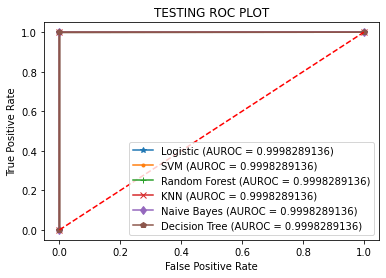

In [82]:
#plotting the diagram
plt.plot(lr_fpr,lr_tpr, marker='*', label='Logistic (AUROC = %0.10f)' % lr_auc)
plt.plot(sv_fpr,sv_tpr, marker='.', label='SVM (AUROC = %0.10f)' % sv_auc)
plt.plot(rf_fpr, rf_tpr, marker='+', label='Random Forest (AUROC = %0.10f)' % rf_auc)
plt.plot(kn_fpr,kn_tpr, marker='x', label='KNN (AUROC = %0.10f)' % kn_auc)
plt.plot(nb_fpr, nb_tpr, marker='d', label='Naive Bayes (AUROC = %0.10f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='p', label='Decision Tree (AUROC = %0.10f)' % dt_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.title('TESTING ROC PLOT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.savefig('roc_grpah.jpg')
plt.show()

Tval is for taining data and other is for test data.

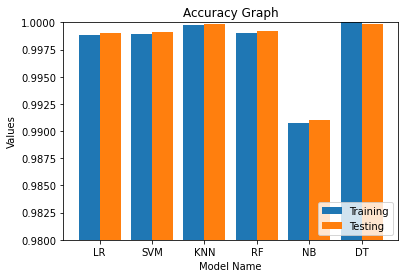

In [83]:
tval = {'LR':tacc[0],'SVM':tacc[1],'KNN':tacc[2],'RF':tacc[3],'NB':tacc[4],'DT':tacc[5]}
val = {'LR':acc[0],'SVM':acc[1],'KNN':acc[2],'RF':acc[3],'NB':acc[4],'DT':acc[5]}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())



axes = plt.axes()
axes.set_ylim([0.98, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Accuracy Graph')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing')
plt.legend(loc ='lower right')
plt.savefig("acc.png",dpi = 300)
plt.show()

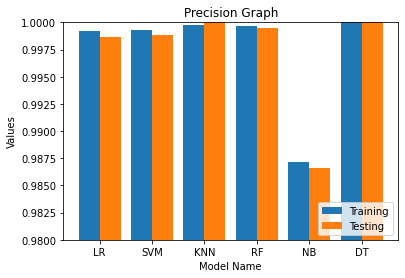

In [84]:
tval = {'LR':tprec[0],'SVM':tprec[1],'KNN':tprec[2],'RF':tprec[3],'NB':tprec[4],'DT':tprec[5]}
val = {'LR':pre[0],'SVM':pre[1],'KNN':pre[2],'RF':pre[3],'NB':pre[4],'DT':pre[5]}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())



axes = plt.axes()
axes.set_ylim([0.98, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Precision Graph')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing')
plt.legend(loc ='lower right')
plt.savefig("pre.png",dpi = 300)
plt.show()

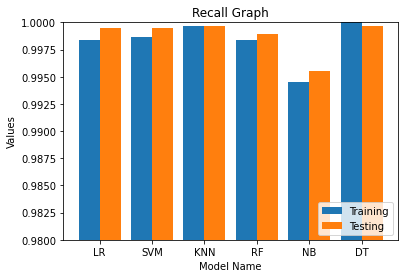

In [85]:
tval = {'LR':trec[0],'SVM':trec[1],'KNN':trec[2],'RF':trec[3],'NB':trec[4],'DT':trec[5]}
val = {'LR':rec[0],'SVM':rec[1],'KNN':rec[2],'RF':rec[3],'NB':rec[4],'DT':rec[5]}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())



axes = plt.axes()
axes.set_ylim([0.98, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Recall Graph')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing')
plt.legend(loc ='lower right')
plt.savefig("rec.png",dpi = 300)
plt.show()

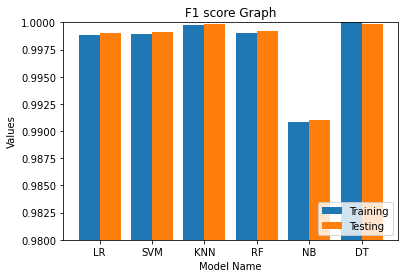

In [86]:
tval = {'LR':tf1[0],'SVM':tf1[1],'KNN':tf1[2],'RF':tf1[3],'NB':tf1[4],'DT':tf1[5]}
val = {'LR':f1_s[0],'SVM':f1_s[1],'KNN':f1_s[2],'RF':f1_s[3],'NB':f1_s[4],'DT':f1_s[5]}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())



axes = plt.axes()
axes.set_ylim([0.98, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('F1 score Graph')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing')
plt.legend(loc ='lower right')
plt.savefig("f_1.png",dpi = 300)
plt.show()